In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import yfinance as yf
import investpy as inv

In [2]:
inv.get_etfs_list('brazil')

['Ishares Ibovespa',
 'It Now Ibovespa Fundo De Indice',
 'ETF Bradesco Ibovespa Fdo De Indice',
 'XP MALLS FDO INV IMOB FII',
 'iShares BM&FBOVESPA Small Cap',
 'Fundo de Invest Ishares SP 500',
 'Malls Brasil Plural Fundo De Investimento Imobilia',
 'Fdo Inv Imob VBI Logístico',
 'It Now SP500 TRN',
 'General Shopping e Outlets do Brasil Fundo de Inve',
 'It Now PIBB IBrX-50',
 'Fundo de Investimento Imobiliario FII UBS BR Receb',
 'It Now IDIV',
 'It Now IFNC',
 'Fundo de FI Imobiliario Kinea FII',
 'FI Imobiliario - Ourinvest Fundo de Fundos',
 'iShares IBrX Brasil',
 'BB SP Dividendos',
 'It Now IMAT',
 'iShares Carbono Eficiente (ICO2) Brasil',
 'Caixa Rio Bravo Fundo de Fundos de Investimento Im',
 'It Now IGCT',
 'CAIXA Ibovespa',
 'It Now ISE',
 'Votorantim Securities Master FII-FII',
 'Brazil Realty Fundo de Investimento Imobiliario FI',
 'Loft I - Fdo Inv Imob']

In [3]:
etfs = ['Ishares Ibovespa','iShares BM&FBOVESPA Small Cap','Fundo de Invest Ishares SP 500']

In [5]:
data_inicio = '30/12/2014'
data_fim = '19/06/2021'

In [6]:
ibov = inv.get_index_historical_data('Bovespa','brazil', from_date = data_inicio,
                to_date = data_fim)[['Close']].pct_change().dropna()
ibov.columns = ['ibov']

In [7]:
prices = pd.DataFrame(columns = etfs)
for etf in etfs:
    try:
        ativo = inv.get_etf_historical_data(etf,'brazil', from_date = data_inicio,
                to_date = data_fim)['Close']
        prices[etf] = ativo
    except:
        print(f'Nao foi encontrado o {etf}')
        prices.drop(etf, axis = 1, inplace = True)

In [8]:
prices.columns = ['BOVA11','SMAL11','IVVB11']
prices.head()

,BOVA11,SMAL11,IVVB11
Date,,,
2014-12-30,48.54,53.11,55.39
2015-01-02,47.26,52.02,55.80
2015-01-05,46.32,50.55,55.75
2015-01-06,46.58,50.00,54.85
2015-01-07,48.15,51.25,55.17


In [9]:
retornos = prices.pct_change().dropna()
retornos.head()

,BOVA11,SMAL11,IVVB11
Date,,,
2015-01-02,-0.026370,-0.020523,0.007402
2015-01-05,-0.019890,-0.028258,-0.000896
2015-01-06,0.005613,-0.010880,-0.016143
2015-01-07,0.033705,0.025000,0.005834
2015-01-08,0.007477,0.014634,0.011419


In [17]:
# pesos carteira
#BOVA | SMAL | IVVB
pesos = [[0.5,0.0,0.5],
         [0.0,0.5,0.5],
         [0.5,0.5,0.0],
        [0.33,0.33,0.33]]

In [18]:
carteiras = pd.DataFrame()

for i, peso in enumerate(pesos):
    carteiras[f'carteira {i+1}'] = retornos @ peso
    
carteiras = pd.concat([carteiras, ibov, retornos], axis = 1)
carteiras

,carteira 1,carteira 2,carteira 3,carteira 4,ibov,BOVA11,SMAL11,IVVB11
Date,,,,,,,,
2015-01-02,-0.009484,-0.006561,-0.023447,-0.013032,-0.029896,-0.026370,-0.020523,0.007402
2015-01-05,-0.010393,-0.014577,-0.024074,-0.016185,-0.020510,-0.019890,-0.028258,-0.000896
2015-01-06,-0.005265,-0.013512,-0.002634,-0.007066,0.010186,0.005613,-0.010880,-0.016143
2015-01-07,0.019770,0.015417,0.029353,0.021298,0.030458,0.033705,0.025000,0.005834
2015-01-08,0.009448,0.013027,0.011055,0.011065,0.009704,0.007477,0.014634,0.011419
...,...,...,...,...,...,...,...,...
2021-06-14,-0.002574,0.001995,0.009952,0.003093,0.005925,0.005382,0.014521,-0.010531
2021-06-15,-0.004137,-0.005851,-0.001474,-0.003783,-0.000899,0.000240,-0.003188,-0.008514
2021-06-16,-0.004049,-0.000998,-0.004618,-0.003189,-0.006396,-0.007669,-0.001566,-0.000429


In [19]:
carteiras_normalizadas = (1 + carteiras.iloc[1:]).cumprod()
carteiras_normalizadas.iloc[0] = 1

In [20]:
carteiras_normalizadas

,carteira 1,carteira 2,carteira 3,carteira 4,ibov,BOVA11,SMAL11,IVVB11
Date,,,,,,,,
2015-01-05,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
2015-01-06,0.984397,0.972108,0.973356,0.976864,0.989467,0.985612,0.961169,0.982975
2015-01-07,1.003858,0.987095,1.001926,0.997669,1.019603,1.018832,0.985198,0.988710
2015-01-08,1.013342,0.999953,1.013003,1.008709,1.029498,1.026449,0.999616,1.000000
2015-01-09,0.993572,0.980930,0.993030,0.989319,1.006761,1.005713,0.980392,0.981183
...,...,...,...,...,...,...,...,...
2021-06-14,3.620142,3.848862,2.844315,3.441832,2.684037,2.648117,2.954633,4.209677
2021-06-15,3.605165,3.826342,2.840123,3.428813,2.681625,2.648752,2.945213,4.173835
2021-06-16,3.590567,3.822523,2.827008,3.417877,2.664475,2.628438,2.940600,4.172043


<AxesSubplot:xlabel='Date'>

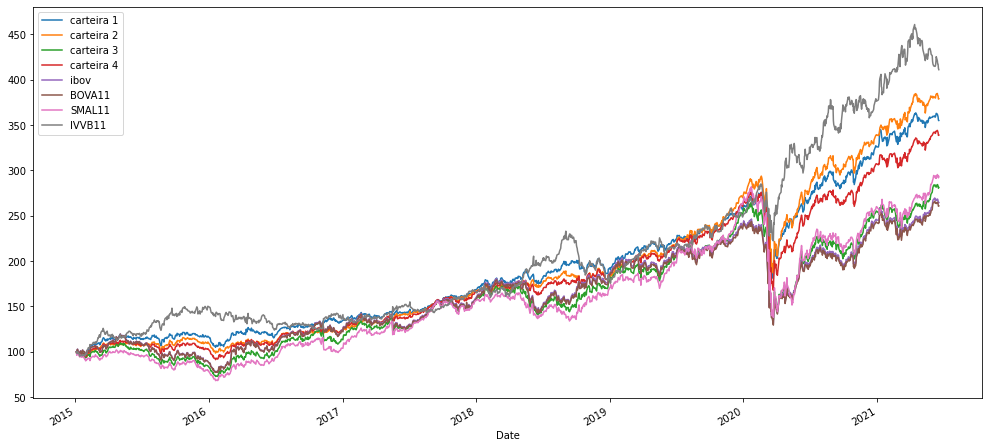

In [21]:
(carteiras_normalizadas*100).plot(figsize=(17,8))

In [25]:
resultados = pd.DataFrame(index = ['retorno total','volatilidade'], columns = carteiras.columns)
resultados.loc['volatilidade'] = carteiras.std()*252**0.5
resultados.loc['retorno total'] = carteiras_normalizadas.iloc[-1] - 1

In [32]:
carteiras

,carteira 1,carteira 2,carteira 3,carteira 4,ibov,BOVA11,SMAL11,IVVB11
Date,,,,,,,,
2015-01-02,-0.009484,-0.006561,-0.023447,-0.013032,-0.029896,-0.026370,-0.020523,0.007402
2015-01-05,-0.010393,-0.014577,-0.024074,-0.016185,-0.020510,-0.019890,-0.028258,-0.000896
2015-01-06,-0.005265,-0.013512,-0.002634,-0.007066,0.010186,0.005613,-0.010880,-0.016143
2015-01-07,0.019770,0.015417,0.029353,0.021298,0.030458,0.033705,0.025000,0.005834
2015-01-08,0.009448,0.013027,0.011055,0.011065,0.009704,0.007477,0.014634,0.011419
...,...,...,...,...,...,...,...,...
2021-06-14,-0.002574,0.001995,0.009952,0.003093,0.005925,0.005382,0.014521,-0.010531
2021-06-15,-0.004137,-0.005851,-0.001474,-0.003783,-0.000899,0.000240,-0.003188,-0.008514
2021-06-16,-0.004049,-0.000998,-0.004618,-0.003189,-0.006396,-0.007669,-0.001566,-0.000429


In [23]:
resultados.applymap(lambda x:f'{x:.1%}')

,carteira 1,carteira 2,carteira 3,carteira 4,ibov,BOVA11,SMAL11,IVVB11
retorno total,255.1%,279.0%,181.3%,239.0%,164.7%,160.8%,193.3%,311.1%
volatilidade,18.5%,18.5%,26.3%,19.7%,26.7%,27.0%,27.6%,21.7%


<AxesSubplot:>

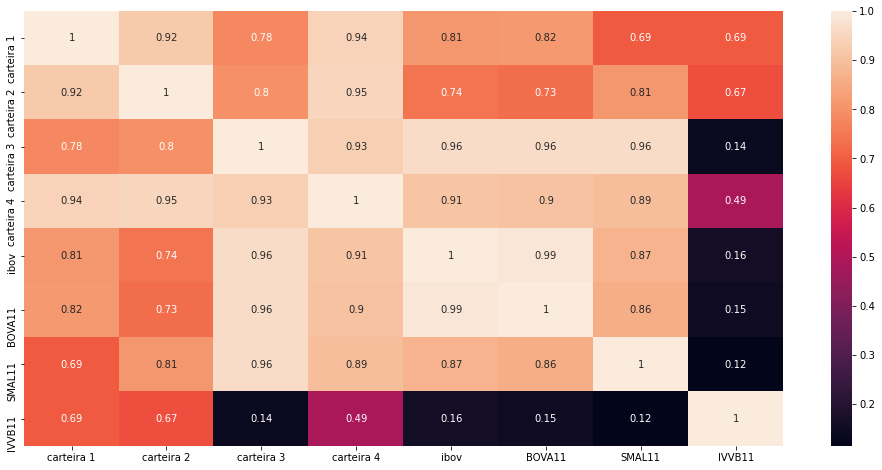

In [31]:
plt.figure(figsize=(17,8))
sns.heatmap(carteiras.corr(),annot = True)